# Network Science (HS21)
## Assignment 6

### Ben     Murphy          16-714-925
### Florian Rüegsegger      14-714-737

#### The excercise was solved together in person



In [7]:
import os
import networkx as nx
import re
from networkx import read_graphml
from NEMtropy import UndirectedGraph, DirectedGraph
from NEMtropy.network_functions import build_adjacency_from_edgelist
import numpy as np
from typing import Dict
import matplotlib.pyplot as plt
from networkx import degree_pearson_correlation_coefficient

# A06.1

In [13]:
def fit_and_sample_cm(graph: nx.Graph,cm_class, model, name: str):
    adj_matrix = nx.to_numpy_array(graph)
    graph = cm_class(adj_matrix)
    graph.solve_tool(model=model)
    graph.ensemble_sampler(10,cpu_n=1, output_dir=f"samples/{graph.__class__.__name__}/{name}/")


def get_data(graph: nx.Graph, name: str, skip_sampling):
    if not skip_sampling:
        fit_and_sample_cm(graph, UndirectedGraph,"cm_exp",name)
        fit_and_sample_cm(graph, DirectedGraph,"dcm_exp", name)
    clusterings = []
    reciprocities = []
    for i in range(10):
        edgelist = np.loadtxt(f"samples/DirectedGraph/{name}/{i}.txt")
        net = nx.DiGraph()
        net.add_edges_from(edgelist)
        
        clusterings.append(nx.average_clustering(net))
        reciprocities.append(nx.reciprocity(net))

    return np.mean(clusterings), np.mean(reciprocities)


def plot_data(x,y,label):
    plt.plot(x, y, label=label)

def solve01(graphs: Dict,skip_sampling=False):
    clusters_og = []
    recip_og = []
    clusters_model = []
    recip_model = []
    
    keys = sorted([key for key in graphs.keys()])
    for key in keys:
        print(f"{key}")
        clusters_og.append(nx.average_clustering(graphs[key]))
        recip_og.append(nx.reciprocity(graphs[key]))

        data = get_data(graphs[key], key, skip_sampling)
        clusters_model.append(data[0])
        recip_model.append(data[1])
    
    plot_data(keys, clusters_og, "clusters_og")
    plot_data(keys, clusters_model, "clusters_model")
    plot_data(keys, recip_og, "recip_og")
    plot_data(keys, recip_model, "recip_model")
    plt.legend()
    plt.show()



In [2]:
data_paths = os.listdir('data/')
data = {}
regex = re.compile(r'\d+')
for data_path in data_paths:
    year = regex.findall(data_path)
    data[int(year[0])] = read_graphml('data/' + data_path)

1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002


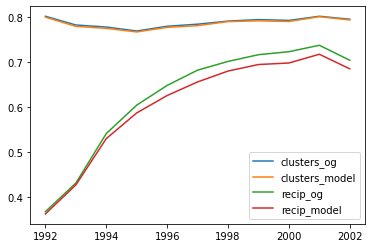

In [51]:
solve01(data,skip_sampling=True)

# A06.2

In [16]:
def fit_and_sample_crema(graph: nx.Graph,cm_class, adjaceny, name: str):
    adj_matrix = nx.to_numpy_array(graph)
    graph = cm_class(adj_matrix)
    graph.solve_tool(
        model="crema",
        method="newton",
        initial_guess="random",
        adjacency=adjaceny,
        method_adjacency="newton"
    )
    graph.ensemble_sampler(10,cpu_n=1, output_dir=f"samples/crema/{graph.__class__.__name__}/{name}/")


def get_data_weight(graph: nx.Graph, name: str, skip_sampling):
    if not skip_sampling:
        fit_and_sample_crema(graph, UndirectedGraph,"cm_exp",name)
        fit_and_sample_crema(graph, DirectedGraph,"dcm_exp", name)
    assortativities_directed = []
    assortativities_undirected = []

    for i in range(10):
        edgelist = np.loadtxt(f"samples/crema/DirectedGraph/{name}/{i}.txt")
        net = nx.DiGraph()
        net.add_weighted_edges_from(edgelist)
        assortativities_directed.append(degree_pearson_correlation_coefficient(net, weight="weight"))

    for i in range(10):
        edgelist = np.loadtxt(f"samples/crema/UndirectedGraph/{name}/{i}.txt")
        net = nx.Graph()
        net.add_weighted_edges_from(edgelist)
        assortativities_undirected.append(degree_pearson_correlation_coefficient(net, weight="weight"))
     
    

    return np.mean(assortativities_directed), np.mean(assortativities_undirected)

def solve02(graphs: Dict,skip_sampling=False):
    assort_og = []
    assort_model_undirected = []
    assort_model_directed = []
    keys = sorted([key for key in graphs.keys()])
    for key in keys:
        print(f"{key}")
        assort_og.append(degree_pearson_correlation_coefficient(graphs[key], weight="weight"))
        data = get_data_weight(graphs[key], key, skip_sampling)
        assort_model_directed.append(data[0])
        assort_model_undirected.append(data[1])
    
    plot_data(keys, assort_og, "assort_og")
    plot_data(keys, assort_model_directed, "assort_model_directed")
    plot_data(keys, assort_model_undirected, "assort_model_undirected")
    plt.legend()
    plt.show()




1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002


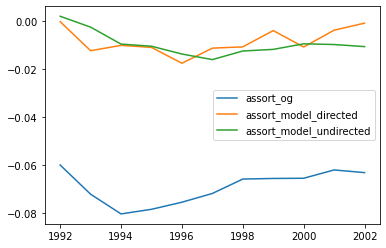

In [17]:
solve02(data, skip_sampling=True)